# ShopAssist AI

RAG: Retrieval Augemented generation : it helps the LLM model to provide relevant answers when it comes to propreity/enterprise/risky/personal data.

API: connection to a hosted service(cloud) - send some parameter(location, lattitude, longitude, time, input text, model name) -- ANSWER to you )

Build a sequence of layers on top of this ChatGPT API to set up a dialogue management system (shop assist AI)

Without relevant context:
INput question(prompt) = I'm sorry i don't have any such information
relevant context - rule based extraction (STAGE2)
Input question(prompt | context)
answer your question appropriately

Capabilities of our chatbot:
1 - understanding a user ( intent)
2 - Extracting the products based on the intent
3 - Recommned these products to the user

## Part 1: Introduction

#### **What you have learnt till now**

So far you have learnt how to make LLM API calls in Python. In particular, you worked with OpenAI's GPT 3.5 models and the `Chat Completion API` to build a simple AI tutor.

<br>

Next, you went over some principles, techniques, and tactics for prompt engineering.
The two main principles of writing a good prompt:
1.  Providing clear instructions,
2.  Enhancing LLM reasoning capabilities.

Under providing clear instructions, you learnt how to structure the body of a prompt through 5 components - **Task, Role, Context, Guidelines and Output Format**.

You also understood that providing a very clear syntax and conditioning on good performance can get you closer to the desired output.

<br>

Next, under enhancing LLM reasoning capabilities, you learnt two specific techniques -
(i) Chain-of-Thought prompting,
(ii) Few-Shot prompting.

Under chain-of-thought prompting, you essentially enable the LLM to work through the solution step-by-step and in few-shot prompting, you provide relevant examples of how you want the outputs to look like. So now you could structure your prompts into proper components and provide clear chain-of-thought instructions along with relevant examples of ideal inputs and outputs.

You also learnt some advanced prompting techniques like self-consistency and ReAct prompting. Self-consistency is basically the technique where you ensemble multiple attempts and select the most consistent output out of them. And in ReAct prompting, you enable the LLM to reason out a scenario and act based on some examples.

<br>

Finally, you looked at some examples of how you can design LLM-based systems. Apart from prompting techniques, you understood that designing a LLM-based system also requires a safe design, i.e., the capabilities to detect and respond to unsafe user queries and prompt injections. You looked at the moderation API offered by OpenAI that can help you design such safer systems.

With all of these learnings, let’s now get started on designing our first LLM application - ShopAssist AI.


#### Project Background

In today's digital age, online shopping has become the go-to option for many consumers. However, the overwhelming number of choices and the lack of personalized assistance can make the shopping experience daunting. To address this, we have developed **ShopAssist AI, a chatbot that combines the power of large language models and rule-based functions to ensure accurate and reliable information delivery**.


#### Problem Statement

*Given a dataset containing information about laptops (product names, specifications, descriptions, etc.), build a chatbot that parses the dataset and provides accurate laptop recommendations based on user requirements*.


You can load the data and see it here.

In [64]:
# Install OpenAI library
!pip install -U -q openai tenacity

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import os
os.chdir('/content/drive/MyDrive/upgrad/GenAI_Course_Master/Course_1_ShopAssistAI/Week_1')
!ls

laptop_data.csv  OpenAI_API_Key.txt  ShopAssistAI_Demonstration_v2_Stage1.ipynb  updated_laptop.csv


In [4]:
# Import the libraries
import pandas as pd
from IPython.display import display, HTML
# Set the display width to control the output width
pd.set_option('display.width', 100)
# Read the dataset and read the Laptop Dataset
df = pd.read_csv('laptop_data.csv')
df

Brand          Model Name     Core CPU Manufacturer Clock Speed RAM Size Storage Type  \
0        Dell            Inspiron       i5            Intel     2.4 GHz      8GB          SSD   
1         MSI                GL65       i7            Intel     2.6 GHz     16GB      HDD+SSD   
2          HP           EliteBook       i7            Intel     2.8 GHz     16GB          SSD   
3      Lenovo             IdeaPad       i3            Intel     2.1 GHz      8GB          HDD   
4        ASUS         ZenBook Pro       i9            Intel     3.1 GHz     64GB          SSD   
5        Acer            Predator       i7            Intel     2.8 GHz     16GB          SSD   
6   Microsoft      Surface Laptop       i5            Intel     1.6 GHz      8GB          SSD   
7      Lenovo            ThinkPad  Ryzen 7              AMD     3.0 GHz     16GB          SSD   
8          HP            Pavilion       i5            Intel     2.3 GHz     12GB          HDD   
9        ASUS         ROG Strix G       i7            Intel     2.9 GHz     16GB          SSD   
10       Dell              XPS 15       i9            Intel     2.8 GHz     32GB          SSD   
11     Lenovo  ThinkPad X1 Carbon       i7            Intel     2.6 GHz     16GB          SSD   
12       Acer             Swift 3  Ryzen 5              AMD     2.3 GHz      8GB          SSD   
13      Apple         MacBook Air       M1            Apple     3.2 GHz     16GB          SSD   
14        MSI         Prestige 14       i5            Intel     2.4 GHz     16GB          SSD   
15       ASUS          ZenBook 13       i7            Intel     2.8 GHz     16GB          SSD   
16       Dell      Precision 5550     Xeon            Intel     2.6 GHz     32GB          SSD   
17         HP           ENVY x360       i7            Intel     2.8 GHz     16GB          SSD   
18      Razer            Blade 15       i7            Intel     2.6 GHz     16GB          SSD   
19      Apple         MacBook Pro       i9            Intel     2.9 GHz     32GB          SSD   

   Display Type Display Size Graphics Processor Screen Resolution          OS Laptop Weight  \
0           LCD        15.6"          Intel UHD         1920x1080  Windows 10        2.5 kg   
1           IPS        15.6"         NVIDIA GTX         1920x1080  Windows 10        2.3 kg   
2           LED          14"          Intel UHD         1920x1080  Windows 11        1.5 kg   
3            TN        15.6"          Intel UHD          1366x768  Windows 10        2.2 kg   
4          OLED        15.6"         NVIDIA RTX         3840x2160  Windows 10        1.8 kg   
5           IPS        17.3"         NVIDIA GTX         1920x1080  Windows 10        3.2 kg   
6    PixelSense        13.5"    Intel Iris Plus         2256x1504  Windows 11        1.3 kg   
7           IPS          14"         NVIDIA GTX         2560x1440       Linux        1.6 kg   
8           LCD        15.6"          Intel UHD          1366x768  Windows 10        2.1 kg   
9           IPS        17.3"         NVIDIA RTX         1920x1080  Windows 10        2.9 kg   
10         OLED        15.6"         NVIDIA GTX         3840x2160  Windows 11        1.8 kg   
11          IPS          14"          Intel UHD         2560x1440  Windows 10       1.13 kg   
12          IPS          14"         AMD Radeon         1920x1080  Windows 11        1.2 kg   
13       Retina        13.3"           Apple M1         2560x1600       macOS       1.29 kg   
14          IPS          14"         NVIDIA GTX         1920x1080  Windows 10       1.29 kg   
15     NanoEdge        13.3"      Intel Iris Xe         1920x1080  Windows 11       1.11 kg   
16         OLED        15.6"      NVIDIA Quadro         3840x2160      Ubuntu       1.83 kg   
17          IPS        15.6"      Intel Iris Xe         1920x1080  Windows 10       2.05 kg   
18          IPS        15.6"         NVIDIA RTX         1920x1080  Windows 11       2.09 kg   
19       Retina          16"         AMD Radeon         3072x1920     

#### Approach:

1. **Conversation and Information Gathering**: The chatbot will utilize language models to understand and generate natural responses. Through a conversational flow, it will ask relevant questions to gather information about the user's requirements.
2. **Information Extraction**: Once the essential information is collected, rule-based functions come into play, extracting top 3 laptops that best matches the user's needs.
3. **Personalized Recommendation**: Leveraging this extracted information, the chatbot engages in further dialogue with the user, efficiently addressing their queries and aiding them in finding the perfect laptop solution.

## Part 2: System Design


#### Dataset

We have a dataset `laptop.csv` where  each row describes the features of a single laptop and also has a small description at the end. The chatbot that we build will leverage LLMs to parse this `Description` column and provide recommendations

#### Workings of the Chatbot

**Note1** - Don't run this when you go through this section for the first time. Run this only after running through the rest of the code. When going through this for the first time, please only go through the output, to understand the workings of the chatbot

**Note2** - The conversation shown here might be different from what you see in the video. However, the overall structure of the conversation to understand the system design remains the same.

In [ ]:
dialogue_mgmt_system()

NameError: name 'dialogue_mgmt_system' is not defined

As you could see in the output above, the chatbot should ask a series of questions to
- Determine the user's requirments. For simplicity, we have used 6 features to encapsulate the user's needs. The 6 features are as follows:
    - GPU intensity
    - Display quality
    - Portability
    - Multitasking
    - Processing speed
    - Budget

- Confirm if the user's requirements have been correctly captured at the end.

After that the chatbot lists down the top 3 products that are the most relevant, and engages in further conversation to help the user find the best one.


#### Building the Chatbot

Now let's go ahead and understand the system design for the chatbot.

![Chatbot_sys_design.png](https://drive.google.com/uc?id=1j-mw_dNcbxGcelQ0PmkDB0nKOpauU1wX)

|`Stage 1`

- Intent Clarity Layer
- Intent Confirmation Layer

`Stage 2`

- Product Mapping Layer
- Product Information Extraction Layer

`Stage 3`

- Product Recommendation Layer

##### Major functions behind the Chatbot

Let's now look at a brief overview of the major functions that form the chatbot. We'll take a deep dive later



- `initialize_conversation()`: This initializes the variable conversation with the system message.
- `get_chat_completions()`: This takes the ongoing conversation as the input and returns the response by the assistant
- `moderation_check()`: This checks if the user's or the assistant's message is inappropriate. If any of these is inappropriate, it ends the conversation.
- `intent_confirmation_layer()`: This function takes the assistant's response and evaluates if the chatbot has captured the user's profile clearly. Specifically, this checks if the following properties for the user has been captured or not GPU intensity, Display quality, Portability, Multitasking, Processing speed, Budget
- `dictionary_present()`: This function checks if the final understanding of user's profile is returned by the chatbot as a python dictionary or not. If there is a dictionary, it extracts the information as a Python dictionary.
- `compare_laptops_with_user()`: This function compares the user's profile with the different laptops and come back with the top 3 recommendations.
- `initialize_conv_reco()`: Initializes the recommendations conversation

In the next sections, we will look at how to write the code for the above functions.

## Part 3: Implementation

## Stage 1

[Stage 1 Flowchart](https://cdn.upgrad.com/uploads/production/ed8cf454-0c7c-4c5d-bc05-23bb3cea6c57/image+3.jpg)

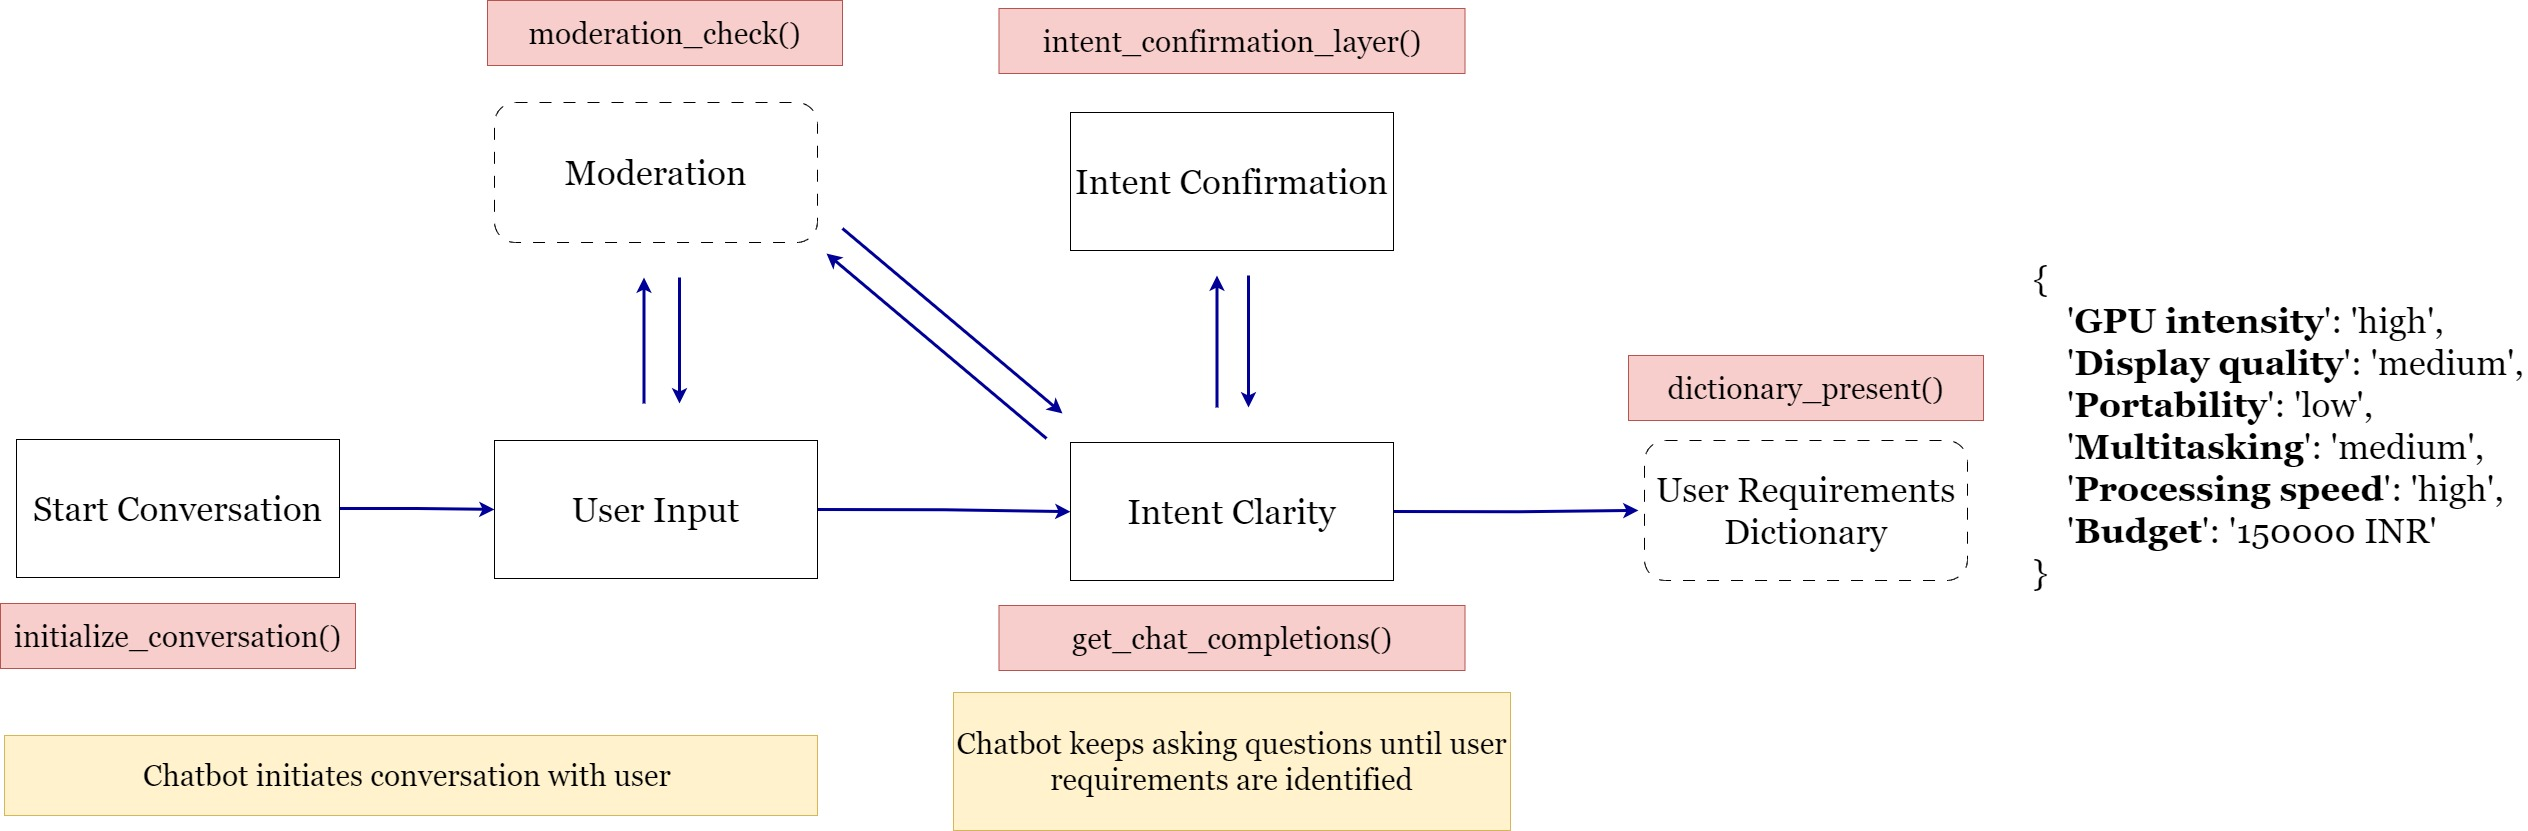

### 3.1 - Import the libraries

Let's start by importing the libraries that we'll require for this project. Following are the ones:
- openai
- pandas
- os, json, ast

Make sure the api key is stored in the text file `OPENAI_API_Key.txt`.

In [14]:
# Import the libraries
import os, json, ast
import openai
from tenacity import retry, wait_random_exponential, stop_after_attempt

In [28]:
# read the OpenAI API key
openai.api_key = open("OpenAI_API_Key.txt", "r").read().strip()
os.environ['OPENAI_API_KEY'] = openai.api_key

In [29]:
openai.api_key

'sk-proj-vqjtHcNsr6uMSyJajHgeT3BlbkFJcXOvVN1PcIQiUyUARnl6'

In [16]:
# # Recall that messages to the LLM is a list of dicts containing system_message, user_input and assistant_message
# conversation = [{"role": "system", "content": system_message},
#                 {"role": "user", "content": user_input},
#                 {"role": "assistant", "content": assistant_message}]

OPEN API VS CHATGPT



### 3.2 - Implementing Intent Clarity and Intent Confirmation Layers

Let's start with the first part of the implementation - building the `intent clarity` and `intent confirmation` layers. As mentioned earlier, this layer helps in identifying the user requirements and passing it on to the product matching layer. Here are the functions that we would be using for building these layers:

- `initialize_conversation()`


### `initialize_conversation()`:
This initializes the variable conversation with the system message. Using prompt engineering and chain of thought reasoning, the function will enable the chatbot to keep asking questions until the user requirements have been captured in a dictionary. It also includes Few Shot Prompting(sample conversation between the user and assistant) to align the model about user and assistant responses at each step.



```
def initialize_conversation():
    '''
    Initializes a conversation for an intelligent laptop gadget expert system.

    Returns:
        list: [{"role": "system", "content": system_message}]
        A list containing a dictionary representing the system's initial message.
        
    The function initializes a conversation with the user, providing instructions, examples,
    and a sample conversation to guide the user in interacting with the system. The system's
    initial message includes information about the purpose of the conversation, instructions
    for filling in user profile details, guidelines for asking questions, and a sample
    conversation demonstrating how the interaction with the system progresses.

    The system expects the user to provide information related to their laptop requirements,
    including GPU intensity, display quality, portability, multitasking needs, processing
    speed, and budget. The provided information is used to update a predefined dictionary
    representing the user's profile. The system emphasizes extracting specific details from
    the user's responses to accurately fill in the dictionary values.

    The conversation flow involves three main thoughts:
    - Thought 1: Understanding the user's profile and filling confident values.
    - Thought 2: Filling values for remaining keys based on gathered information.
    - Thought 3: Confirming and verifying updated dictionary values.

    Users are encouraged to engage in a meaningful conversation with the system to ensure
    accurate profile representation and tailored recommendations for the best laptop choice.

    Usage:
        # Initialise the conversation
        conversation = initialize_conversation()
        # Print the conversation
        print(conversation)
    '''
    ```



In [17]:
def initialize_conversation():
    '''
    Returns a list [{"role": "system", "content": system_message}]
    '''

    delimiter = "####"

    example_user_dict = {'GPU intensity': "high",
                        'Display quality':"high",
                        'Portability': "low",
                        'Multitasking': "high",
                        'Processing speed': "high",
                        'Budget': "150000"}

    example_user_req = {'GPU intensity': "_",
                        'Display quality': "_",
                        'Portability': "_",
                        'Multitasking': "_",
                        'Processing speed': "_",
                        'Budget': "_"}

    system_message = f"""
    You are an intelligent laptop gadget expert and your goal is to find the best laptop for a user.
    You need to ask relevant questions and understand the user profile by analysing the user's responses.
    You final objective is to fill the values for the different keys ('GPU intensity','Display quality','Portability','Multitasking','Processing speed','Budget') in the python dictionary and be confident of the values.
    These key value pairs define the user's profile.
    The python dictionary looks like this
    {{'GPU intensity': 'values','Display quality': 'values','Portability': 'values','Multitasking': 'values','Processing speed': 'values','Budget': 'values'}}
    The value for 'Budget' should be a numerical value extracted from the user's response.
    The values for all keys, except 'Budget', should be 'low', 'medium', or 'high' based on the importance of the corresponding keys, as stated by user.
    All the values in the example dictionary are only representative values.
    {delimiter}
    Here are some instructions around the values for the different keys. If you do not follow this, you'll be heavily penalised:
    - The values for all keys, except 'Budget', should strictly be either 'low', 'medium', or 'high' based on the importance of the corresponding keys, as stated by user.
    - The value for 'Budget' should be a numerical value extracted from the user's response.
    - 'Budget' value needs to be greater than or equal to 25000 INR. If the user says less than that, please mention that there are no laptops in that range.
    - Do not randomly assign values to any of the keys.
    - The values need to be inferred from the user's response.
    {delimiter}

    To fill the dictionary, you need to have the following chain of thoughts:
    Follow the chain-of-thoughts below and only output the final updated python dictionary for the keys as described in {example_user_req}. \n
    {delimiter}
    Thought 1: Ask a question to understand the user's profile and requirements. \n
    If their primary use for the laptop is unclear. Ask followup questions to understand their needs.
    You are trying to fill the values of all the keys {{'GPU intensity','Display quality','Portability','Multitasking','Processing speed','Budget'}} in the python dictionary by understanding the user requirements.
    Identify the keys for which you can fill the values confidently using the understanding. \n
    Remember the instructions around the values for the different keys.
    If the necessary information has been extracted, only then proceed to the next step. \n
    Otherwise, rephrase the question to capture their profile clearly. \n

    {delimiter}
    Thought 2: Now, you are trying to fill the values for the rest of the keys which you couldn't in the previous step.
    Remember the instructions around the values for the different keys.
    Ask questions you might have for all the keys to strengthen your understanding of the user's profile.
    If yes, move to the next Thought. If no, ask question on the keys whose values you are unsure of. \n
    It is a good practice to ask question with a sound logic as opposed to directly citing the key you want to understand value for.
    {delimiter}

    {delimiter}
    Thought 3: Check if you have correctly updated the values for the different keys in the python dictionary.
    If you are not confident about any of the values, ask clarifying questions.
    {delimiter}

    {delimiter}
    Here is a sample conversation between the user and assistant:
    User: "Hi, I am an editor."
    Assistant: "Great! As an editor, you likely require a laptop that can handle demanding tasks. Hence, the laptop should have high multitasking capability. You would also need a high end display for better visuals and editing. May I know what kind of work do you primarily focus on? Are you more involved in video editing, photo editing, or both? Understanding the specific type of editing work will help me tailor my recommendations accordingly. Let me know if my understanding is correct until now."
    User: "I primarily work with After Effects."
    Assistant: "Thank you for providing that information. Working with After Effects involves working with graphics, animations, and rendering, which will require high GPU. Do you work with high-resolution media files, such as 4K videos or RAW photos? Understanding your file sizes will help determine the storage capacity and processing power needed."
    User: "Yes, sometimes I work with 4K videos as well."
    Assistant: "Thank you for the information. Processing 4K vidoes will require a good processor and high GPU. I think we have already determined earlier that you need a high GPU. To ensure I have a complete understanding of your needs, I have one more question: Are you frequently on the go and require a laptop that is lightweight and easy to carry, or do you primarily work from a stationary location?"
    User: "Yes, sometimes I travel but do not carry my laptop."
    Assistant:"Could you kindly let me know your budget for the laptop? This will help me find options that fit within your price range while meeting the specified requirements."
    User: "my max budget is 1.5lakh inr"
    Assistant: "{example_user_dict}"
    {delimiter}

    Start with a short welcome message and encourage the user to share their requirements.
    """
    conversation = [{"role": "system", "content": system_message}]
    # conversation = system_message
    return conversation

Let's see what does `initialize_conversation()` does.

<br>

We have added a prefix `debug_` to each of the variables so that we can play around with the inputs and outputs and it doesn't disturb the main function.

In [66]:
debug_conversation = initialize_conversation()
print(debug_conversation)

[{'role': 'system', 'content': '\n    You are an intelligent laptop gadget expert and your goal is to find the best laptop for a user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'GPU intensity\',\'Display quality\',\'Portability\',\'Multitasking\',\'Processing speed\',\'Budget\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'GPU intensity\': \'values\',\'Display quality\': \'values\',\'Portability\': \'values\',\'Multitasking\': \'values\',\'Processing speed\': \'values\',\'Budget\': \'values\'}\n    The value for \'Budget\' should be a numerical value extracted from the user\'s response.\n    The values for all keys, except \'Budget\', should be \'low\', \'medium\', or \'high\' based on the importance of the corresponding keys, as stat

In [67]:
# Let's look at the content in the debug_conversation key
print(debug_conversation[0]['content'])


    You are an intelligent laptop gadget expert and your goal is to find the best laptop for a user.
    You need to ask relevant questions and understand the user profile by analysing the user's responses.
    You final objective is to fill the values for the different keys ('GPU intensity','Display quality','Portability','Multitasking','Processing speed','Budget') in the python dictionary and be confident of the values.
    These key value pairs define the user's profile.
    The python dictionary looks like this
    {'GPU intensity': 'values','Display quality': 'values','Portability': 'values','Multitasking': 'values','Processing speed': 'values','Budget': 'values'}
    The value for 'Budget' should be a numerical value extracted from the user's response.
    The values for all keys, except 'Budget', should be 'low', 'medium', or 'high' based on the importance of the corresponding keys, as stated by user.
    All the values in the example dictionary are only representative values.


In [68]:
# Let's initialise conversation
system_message = initialize_conversation()
print(system_message[0]["content"])


    You are an intelligent laptop gadget expert and your goal is to find the best laptop for a user.
    You need to ask relevant questions and understand the user profile by analysing the user's responses.
    You final objective is to fill the values for the different keys ('GPU intensity','Display quality','Portability','Multitasking','Processing speed','Budget') in the python dictionary and be confident of the values.
    These key value pairs define the user's profile.
    The python dictionary looks like this
    {'GPU intensity': 'values','Display quality': 'values','Portability': 'values','Multitasking': 'values','Processing speed': 'values','Budget': 'values'}
    The value for 'Budget' should be a numerical value extracted from the user's response.
    The values for all keys, except 'Budget', should be 'low', 'medium', or 'high' based on the importance of the corresponding keys, as stated by user.
    All the values in the example dictionary are only representative values.


Let's now look at the next function.
- `get_chat_completions()`: This takes the ongoing conversation as the input and returns the response by the assistant. We'll use the Chat Completions function for performing LLM calls to OpenAI.

LLM - transformer models (selects the word with the highest probability)
temperature - 0, deterministic mode (top 1 token 80%, token )

### `get_chat_completions()`:

This function perform LLM call using the Chat Completions API to get the LLM response.

In [21]:
# Define a Chat Completions API call
# Retry up to 6 times with exponential backoff, starting at 1 second and maxing out at 20 seconds delay
@retry(wait=wait_random_exponential(min=1, max=20), stop=stop_after_attempt(6))
def get_chat_completions(input, json_format = False):
    MODEL = 'gpt-3.5-turbo'

    system_message_json_output = """<<. Return output in JSON format to the key output.>>"""

    # If the output is required to be in JSON format
    if json_format == True:
        # Append the input prompt to include JSON response as specified by OpenAI
        input[0]['content'] += system_message_json_output

        # JSON return type specified
        chat_completion_json = openai.chat.completions.create(
            model = MODEL,
            messages = input,
            response_format = { "type": "json_object"},
            seed = 1234)

        output = json.loads(chat_completion_json.choices[0].message.content)

    # No JSON return type specified
    else:
        chat_completion = openai.chat.completions.create(
            model = MODEL,
            messages = input,
            seed = 2345)

        output = chat_completion.choices[0].message.content

    return output

'{ "type": "json_object"}'

In [22]:
# # Define Completions API call (Legacy)
# # Note that the Completions API is deprecated and we'll be using only the Chat Completions API in this project
# def get_completions(input_prompt):
#   response = openai.completions.create(
#       model="gpt-3.5-turbo-instruct",
#       prompt=input_prompt,
#       temperature=0)
#   return response.choices[0].text

In [69]:
# Testing the OpenAI functions defined above
input_prompt ='What is the capital of France?'
messages = [{'role':'user','content':input_prompt}]
# system_message_json_output = """<<. Return output in JSON format.>>"""
# messages[0]['content']+=system_message_json_output
messages

[{'role': 'user', 'content': 'What is the capital of France?'}]

In [30]:
## Get LLM Outputs - normal
get_chat_completions(messages) ## Chat Completions API

'The capital of France is Paris.'

In [70]:
## Get LLM Outputs - JSON output
get_chat_completions(messages, json_format = True) ## Chat Completions API and return in JSON format

{'output': 'Paris'}

### iterate_response() - Helper Function:
We've created a small helper test function to ensure the model's response is consistent.
Uncomment the code blocks and run the function `iterate_response(response)` to check if the response of the `intent_confirmation_layer`is consistent.}

In [71]:
def iterate_llm_response(funct, debug_response, num = 10):
    """
    Calls a specified function repeatedly and prints the results.
    This function is designed to test the consistency of a response from a given function.
    It calls the function multiple times (default is 10) and prints out the iteration count,
    the function's response(s).
    Args:
        funct (function): The function to be tested. This function should accept a single argument
                          and return the response value(s).
        debug_response (dict): The input argument to be passed to 'funct' on each call.
        num (int, optional): The number of times 'funct' will be called. Defaults to 10.
    Returns:
        This function only returns the results to the console.
    """
    i = 0  # Initialize counter

    while i < num:  # Loop to call the function 'num' times

        response = funct(debug_response)  # Call the function with the debug response

        # Print the iteration number, result, and reason from the response
        print("Iteration: {0}".format(i))
        print(response)
        print('-' * 50)  # Print a separator line for readability
        i += 1  # Increment the counter

# Example usage: test the consistency of responses from 'intent_confirmation_layer'
iterate_llm_response(get_chat_completions, messages)

Iteration: 0
{
    "output": "Paris"
}
--------------------------------------------------
Iteration: 1
{
    "output": "Paris"
}
--------------------------------------------------
Iteration: 2
{
    "output": "Paris"
}
--------------------------------------------------
Iteration: 3
{
    "output": "Paris"
}
--------------------------------------------------
Iteration: 4
{
    "output": "Paris"
}
--------------------------------------------------
Iteration: 5
{
    "output": "Paris"
}
--------------------------------------------------
Iteration: 6
{
    "output": "Paris"
}
--------------------------------------------------
Iteration: 7
{
    "output": "Paris"
}
--------------------------------------------------
Iteration: 8
{
    "output": "Paris"
}
--------------------------------------------------
Iteration: 9
{
    "output": "Paris"
}
--------------------------------------------------


Let's pass the initialized conversation `debug_conversation` and see what is the assistant's response.

In [33]:
debug_user_input = "Hi, I am Anand. I need a laptop for coding."

In [34]:
debug_conversation.append({"role": "user", "content": debug_user_input})
# print(debug_conversation[0]["content"]) # System Message
print(debug_conversation[1]["content"]) # User Input
print(debug_conversation)

Hi, I am Anand. I need a laptop for coding.
[{'role': 'system', 'content': '\n    You are an intelligent laptop gadget expert and your goal is to find the best laptop for a user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'GPU intensity\',\'Display quality\',\'Portability\',\'Multitasking\',\'Processing speed\',\'Budget\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'GPU intensity\': \'values\',\'Display quality\': \'values\',\'Portability\': \'values\',\'Multitasking\': \'values\',\'Processing speed\': \'values\',\'Budget\': \'values\'}\n    The value for \'Budget\' should be a numerical value extracted from the user\'s response.\n    The values for all keys, except \'Budget\', should be \'low\', \'medium\', or \'high\' based on the i

In [35]:
# Let's look at the debug_conversation list
display(debug_conversation)

[{'role': 'system',
  'content': '\n    You are an intelligent laptop gadget expert and your goal is to find the best laptop for a user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'GPU intensity\',\'Display quality\',\'Portability\',\'Multitasking\',\'Processing speed\',\'Budget\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'GPU intensity\': \'values\',\'Display quality\': \'values\',\'Portability\': \'values\',\'Multitasking\': \'values\',\'Processing speed\': \'values\',\'Budget\': \'values\'}\n    The value for \'Budget\' should be a numerical value extracted from the user\'s response.\n    The values for all keys, except \'Budget\', should be \'low\', \'medium\', or \'high\' based on the importance of the corresponding keys, as st

In [72]:
# Getting the response from the Assistant by passing the conversation to the Chat Completions API
debug_response_assistant = get_chat_completions(debug_conversation)
display(debug_response_assistant)

'Hello! I am here to assist you in finding the best laptop that suits your needs. Please share with me your requirements so that we can determine the ideal laptop for you.'

Let's play around a bit and add the following user's input `debug_user_input` to the conversation `debug_conversation` and see what the assistant responds with.

In [37]:
# Let's append this to the conversation list
debug_conversation.append(({"role": "assistant", "content": debug_response_assistant}))
debug_conversation

[{'role': 'system',
  'content': '\n    You are an intelligent laptop gadget expert and your goal is to find the best laptop for a user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'GPU intensity\',\'Display quality\',\'Portability\',\'Multitasking\',\'Processing speed\',\'Budget\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'GPU intensity\': \'values\',\'Display quality\': \'values\',\'Portability\': \'values\',\'Multitasking\': \'values\',\'Processing speed\': \'values\',\'Budget\': \'values\'}\n    The value for \'Budget\' should be a numerical value extracted from the user\'s response.\n    The values for all keys, except \'Budget\', should be \'low\', \'medium\', or \'high\' based on the importance of the corresponding keys, as st

Typically, whenever the chatbot is interacting with the user, all the conversations should be moderated to identify any inappropriate content. Let's look at the function that can help with it.

### `moderation_check()`:
 This checks if the user's or the assistant's message is inappropriate. If any of these is inappropriate, you can add a break statement to end the conversation.

In [73]:
# Define a function called moderation_check that takes user_input as a parameter.

def moderation_check(user_input):
    # Call the OpenAI API to perform moderation on the user's input.
    response = openai.moderations.create(input=user_input)

    # Extract the moderation result from the API response.
    moderation_output = response.results[0].flagged
    # Check if the input was flagged by the moderation system.
    if response.results[0].flagged == True:
        # If flagged, return "Flagged"
        return "Flagged"
    else:
        # If not flagged, return "Not Flagged"
        return "Not Flagged"

In [74]:
moderation_check("I want to kill them.")

'Flagged'

Let's test moderation on the `debug_user_input`

In [40]:
debug_moderation = moderation_check(debug_user_input)
print(debug_moderation)

Not Flagged


Let's now test moderation on some other text.

In [41]:
print(moderation_check("I want to kill Ravan."))
print(moderation_check("I need a laptop"))

Flagged
Not Flagged


So, this moderation api may not be perfect but if you ask this to the ChatGPT or it's API (GPT 3.5), it'll not help you with such requests. Remember, moderation should also be applied on the GPT 3.5's output.

Let's now check moderation on the assistant's response `debug_response_assistant`.

In [42]:
moderation_check(debug_response_assistant)

'Not Flagged'

As mentioned earlier, you need to understand the user's profile, which essentially means that all the features: GPU intensity, Display quality, Portability, Multitasking, Processing speed, Budget are captured or not. Let's look at the function that helps us verify that.

### `intent_confirmation_layer()`:

This function takes the assistant's response and evaluates if the chatbot has captured the user's profile clearly. Specifically, this checks if the following properties for the user has been captured or not
   - GPU intensity
   - Display quality
   - Portability
   - Multitasking
   - Processing speed
   - Budget



```
def intent_confirmation_layer(response_assistant):
    """
    This function serves as an intent confirmation layer for a laptop recommendation system using OpenAI LLM API.

    Parameters:
    - response_assistant (str): The input text containing user requirements captured through 6 keys:
        'GPU intensity', 'Display quality', 'Portability', 'Multitasking', 'Processing speed', and 'Budget'.

    Returns:
    - str: A one-word string in JSON format indicating if the values for the specified keys are correctly filled.
        - 'Yes' if the values are correctly filled for all keys ('GPU intensity', 'Display quality', 'Portability',
          'Multitasking', 'Processing speed') based on the importance as stated by the user.
        - 'No' otherwise.

    Note:
    - The values for all keys, except 'Budget', should be 'low', 'medium', or 'high' based on their importance as stated by the user.
    - The input text should be structured such that it contains the necessary keys and their corresponding values.
    - The function uses OpenAI's Chat Completion API to evaluate the correctness of the input values.
    """
```



In [75]:
def intent_confirmation_layer(response_assistant):

    delimiter = "####"

    allowed_values = {'low','medium','high'}

    prompt = f"""
    You are a senior evaluator who has an eye for detail.The input text will contain a user requirement captured through 6 keys.
    You are provided an input. You need to evaluate if the input text has the following keys:
    {{
    'GPU intensity': 'values',
    'Display quality':'values',
    'Portability':'values',
    'Multitasking':'values',
    'Processing speed':'values',
    'Budget':'number'
    }}
    The values for the keys should only be from the allowed values: {allowed_values}.
    The 'Budget' key can take only a numerical value.
    Next you need to evaluate if the keys have the the values filled correctly.
    Only output a one-word string in JSON format at the key 'result' - Yes/No.
    Thought 1 - Output a string 'Yes' if the values are correctly filled for all keys, otherwise output 'No'.
    Thought 2 - If the answer is No, mention the reason in the key 'reason'.
    THought 3 - Think carefully before the answering.
    """

    messages=[{"role": "system", "content":prompt },
              {"role": "user", "content":f"""Here is the input: {response_assistant}""" }]

    response = openai.chat.completions.create(
                                    model="gpt-3.5-turbo",
                                    messages = messages,
                                    response_format={ "type": "json_object" },
                                    seed = 1234
                                    # n = 5
                                    )

    json_output = json.loads(response.choices[0].message.content)

    return json_output

In [44]:
# Here are some sample input output pairs for better understanding:
# {delimiter}
# input: "{{'GPU intensity': 'low', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'low'}}"
# output: No

# input: "{{'GPU intensity': 'low', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': '', 'Budget': '90000'}}"
# output: No

# input: "Here is your user profile 'GPU intensity': 'high','Display quality': 'high','Portability': 'medium','Multitasking': 'low','Processing speed': 'high','Budget': '200000'"
# output: Yes

# input: "Here is your recommendation {{'GPU intensity': 'low', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'low', 'Budget': '90000'}}"
# output: Yes

# input: "Here is your recommendation - 'GPU intensity': 'high' - 'Display quality': 'low' - 'Portability': 'low'  - 'Multitasking': 'high' - 'Processing speed': 'high' - 'Budget': '90000' "
# output: Yes

# input: "You can look at this - GPU intensity: high - Display quality: low - Portability: low  - Multitasking: high - Processing speed: high - Budget: 90000"
# output: Yes

# input: "{{GPU intensity: low, Display quality: high, Portability: low, Multitasking:high,Processing speed: Low, Budget: 70000}}"
# output: No

# {delimiter}

Let's apply the function to the assistant's reponse and see if it has captured the user profile.

In [45]:
debug_response_assistant

'Great! As a coder, you likely require a laptop that can handle multitasking efficiently and has good processing speed. This helps in running multiple programs simultaneously and compiling code quickly. Do you prefer a laptop with a dedicated graphics card for any specific tasks, or is integrated graphics sufficient for your coding needs? Understanding your preferences will help us find the best laptop for coding. Can you also provide insights into the importance of display quality and portability in your case?'

In [46]:
debug_confirmation = intent_confirmation_layer(debug_response_assistant)
display(debug_confirmation)

{'result': 'No', 'reason': 'Missing key elements'}

Let's say that after a series of conversations you get the following response from the assistant.

In [47]:
# Example 1 - Let's check with the confirmation_layer if all the keys are present
debug_response_assistant_1 = f"""
Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000 INR'}}
"""
#Note that you are using double curly braces

print(debug_response_assistant_1)


Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000 INR'}



Do you think it'll pass the `intent_confirmation_layer()` test?

 Let's try it out.

In [48]:
response = intent_confirmation_layer(debug_response_assistant_1)
response.get('result') # Extract the result key from the dictionary

'Yes'

In [49]:
# Example 2 - Let's check confirmation_layer if all the keys are present
debug_response_assistant_2 = f"""
Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low'}}
"""
#Note that you are using double curly braces

print(debug_response_assistant_2)


Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low'}



In [50]:
intent_confirmation_layer(debug_response_assistant_2)
# iterate_llm_response(intent_confirmation_layer, debug_response_assistant_2)

{'result': 'No', 'reason': 'Budget key is missing.'}

In [51]:
# Example 3 - Let's check confirmation_layer if all the keys are present
debug_response_assistant_3 = f"""
Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000'}}
"""
#Note that you are using double curly braces

print(debug_response_assistant_3)


Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the laptop you are looking for:
{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000'}



In [52]:
intent_confirmation_layer(debug_response_assistant_3)
# iterate_llm_response(intent_confirmation_layer, debug_response_assistant_3)

{'result': 'Yes'}

* Stage 1: Understand the user intent through a series of conversation
* Stage 2: Extract the relevant products for the user
* Stage 3: Recommend these products to the user

Let's now look at the working of `dictionary_present()`.

### `dictionary_present()`:

This function checks if the final understanding of user's profile is returned by the chatbot is a Python dictionary or not. This is important as it'll be used later on for finding the right laptops using dictionary matching.

In [53]:
def dictionary_present(response):
    delimiter = "####"

    user_req = {'GPU intensity': 'high',
                'Display quality': 'high',
                'Portability': 'medium',
                'Multitasking': 'high',
                'Processing speed': 'high',
                'Budget': '200000'}

    prompt = f"""You are a python expert. You are provided an input.
            You have to check if there is a python dictionary present in the string.
            It will have the following format {user_req}.
            Your task is to just extract the relevant values from the input and return only the python dictionary in JSON format.
            The output should match the format as {user_req}.

            {delimiter}
            Make sure that the value of budget is also present in the user input. ###
            The output should contain the exact keys and values as present in the input.
            Ensure the keys and values are in the given format:
            {{
            'GPU intensity': 'low/medium/high ',
            'Display quality':'low/medium/high',
            'Portability':'low/medium/high',
            'Multitasking':'low/medium/high',
            'Processing speed':'low/medium/high',
            'Budget':'numerical value'
            }}
            Here are some sample input output pairs for better understanding:
            {delimiter}
            input 1: - GPU intensity: low - Display quality: high - Portability: low - Multitasking: high - Processing speed: medium - Budget: 50,000 INR
            output 1: {{'GPU intensity': 'low', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'medium', 'Budget': '50000'}}

            input 2: {{'GPU intensity':     'low', 'Display quality':     'low', 'Portability':    'medium', 'Multitasking': 'medium', 'Processing speed': 'low', 'Budget': '90,000'}}
            output 2: {{'GPU intensity': 'low', 'Display quality': 'low', 'Portability': 'medium', 'Multitasking': 'medium', 'Processing speed': 'low', 'Budget': '90000'}}

            input 3: Here is your user profile 'GPU intensity': 'high','Display quality': 'high','Portability': 'medium','Multitasking': 'high','Processing speed': 'high','Budget': '200000 INR'
            output 3: {{'GPU intensity': 'high','Display quality': 'high','Portability': 'medium','Multitasking': 'high','Processing speed': 'high','Budget': '200000'}}
            {delimiter}
            """
    messages = [{"role": "system", "content":prompt },
                {"role": "user", "content":f"""Here is the user input: {response}""" }]

    confirmation = get_chat_completions(messages, json_format = True)

    # confirmation = openai.chat.completions.create(
    #                                 model="gpt-3.5-turbo",
    #                                 messages = messages,
    #                                 response_format={ "type": "json_object" },
    #                                 seed = 1234)

    # confirmation = json.loads(confirmation)

    return confirmation

Let's start by passing the `debug_response_assistant`.

In [54]:
debug_response_assistant_n = """
{'GPU intensity':'high',
 'Display quality':'high',
 'Portability':'low',
 'Multitasking':'low',
 'Processing speed':'low',
 'Budget':'50000'}
"""

In [55]:
response_dict_n = dictionary_present(debug_response_assistant_n)
display(response_dict_n)

{'GPU intensity': 'high',
 'Display quality': 'high',
 'Portability': 'low',
 'Multitasking': 'low',
 'Processing speed': 'low',
 'Budget': '50000'}

In [56]:
type(response_dict_n)

dict

What if you pass something like this where it is not in the form of a dictionary? Or some key or some values are missing? Let's see.

In [76]:
debug_response_assistant_n = f"""Thank you for providing your budget.
Based on your budget of 50,000 INR, I will consider this while recommending suitable laptop options for you.
Here is the final recommendation for your laptop:
- GPU intensity: high
- Display quality: high
- Portability: low
- Multitasking: high
- Processing speed: medium
- Budget: 80,000 INR

Please note that these specifications are based on your requirements for surfing and a decent display within your budget.
Let me know if there's anything else I can assist you with!"""

In [77]:
response_dict_n = dictionary_present(debug_response_assistant_n)
display(response_dict_n)

{'GPU intensity': 'high',
 'Display quality': 'high',
 'Portability': 'low',
 'Multitasking': 'high',
 'Processing speed': 'medium',
 'Budget': '80000'}

In [78]:
type(response_dict_n)

dict

In [79]:
# Check for LLM function's consistency
iterate_llm_response(dictionary_present, debug_response_assistant_n)

Iteration: 0
{'GPU intensity': 'high', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'medium', 'Budget': '80000'}
--------------------------------------------------
Iteration: 1
{'GPU intensity': 'high', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'medium', 'Budget': '80000'}
--------------------------------------------------
Iteration: 2
{'GPU intensity': 'high', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'medium', 'Budget': '80000'}
--------------------------------------------------
Iteration: 3
{'GPU intensity': 'high', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'medium', 'Budget': '80000'}
--------------------------------------------------
Iteration: 4
{'GPU intensity': 'high', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'medium', 'Budget': 

Let's quickly take a look at the code that we have run until now.

In [61]:
debug_conversation

[{'role': 'system',
  'content': '\n    You are an intelligent laptop gadget expert and your goal is to find the best laptop for a user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'GPU intensity\',\'Display quality\',\'Portability\',\'Multitasking\',\'Processing speed\',\'Budget\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'GPU intensity\': \'values\',\'Display quality\': \'values\',\'Portability\': \'values\',\'Multitasking\': \'values\',\'Processing speed\': \'values\',\'Budget\': \'values\'}\n    The value for \'Budget\' should be a numerical value extracted from the user\'s response.\n    The values for all keys, except \'Budget\', should be \'low\', \'medium\', or \'high\' based on the importance of the corresponding keys, as st

In [62]:
debug_conversation = initialize_conversation() # load up the system message
debug_user_input = "Hi, I am Sandeep. I need a laptop for editing." # pass the user input
debug_moderation = moderation_check(debug_user_input) #check for moderation
if debug_moderation == "Not Flagged":
  debug_conversation.append({"role": "user", "content": debug_user_input}) #stored in the memory
  debug_response_assistant = get_chat_completions(debug_conversation)
  print(debug_response_assistant)
  debug_conversation.append({"role": "assistant", "content": debug_response_assistant})
  debug_confirmation = intent_confirmation_layer(debug_response_assistant) #stored in the memory
  print(debug_confirmation['result'])
  if debug_confirmation['result']=="No":
    debug_user_input2 = "i want a laptop for editing movies in After effects" # pass the user input
    debug_moderation = moderation_check(debug_user_input2) #check for moderation
    if debug_moderation == "Not Flagged":
        debug_conversation.append({"role": "user", "content": debug_user_input2}) #stored in the memory
        debug_response_assistant = get_chat_completions(debug_conversation)
        print(debug_response_assistant)

Great! As an editor, you likely require a laptop that can handle demanding tasks. Hence, the laptop should have high multitasking capability. You would also need a high-end display for better visuals and editing. May I know what kind of work do you primarily focus on? Are you more involved in video editing, photo editing, or both? Understanding the specific type of editing work will help me tailor my recommendations accordingly. Let me know if my understanding is correct until now.
No
Thank you for providing that information. Working with After Effects involves working with graphics, animations, and rendering, which will require high GPU. Do you work with high-resolution media files, such as 4K videos or RAW photos? Understanding your file sizes will help determine the storage capacity and processing power needed.


In [63]:
debug_conversation = initialize_conversation()
debug_user_input = "Hi, I am Anand. I need a laptop for coding."
debug_moderation = moderation_check(debug_user_input)
debug_conversation.append({"role": "user", "content": debug_user_input})
debug_response_assistant = get_chat_completions(debug_conversation)
debug_moderation = moderation_check(debug_response_assistant)
debug_conversation.append({"role": "assistant", "content": debug_response_assistant})
debug_confirmation = intent_confirmation_layer(debug_response_assistant)
# After a series of conversation...
response_dict_n = dictionary_present(debug_response_assistant_n)
print(response_dict_n)

{'GPU intensity': 'high', 'Display quality': 'high', 'Portability': 'low', 'Multitasking': 'high', 'Processing speed': 'medium', 'Budget': '80000'}


So, now that you have the user profile stored in `response_dict_n`. We'll use this to generate recommendations. Before that, we need to create a similar profile for every laptop. Let's see how we do it.

The notebook containing Stage 2 and Stage 3 can be found in the corresponding module.

## Stage 2

[Stage 2 Flowchart](https://cdn.upgrad.com/uploads/production/c71aa254-32db-4265-a083-f4a540dac014/Stage+2.jpg)

## Stage 3

[Stage 3 Flowchart](https://cdn.upgrad.com/uploads/production/4c12bc73-8c12-4095-90f2-3dfca0f277e5/Stage+3.jpg)